# Simple Linear Regression and Multiple Regression

# Simple Linear Regression

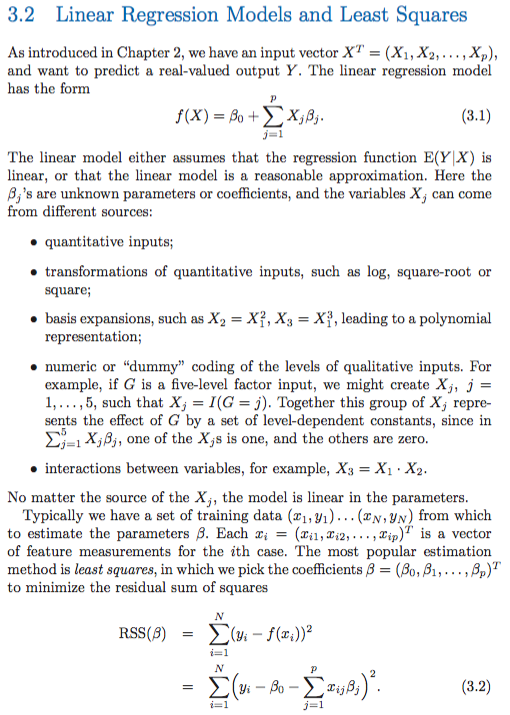

In [1]:
from IPython.display import Image
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/simple-linear-regression.png')

    Put simply, y can be defined as y_i = beta * x_i + alpha + error

In [25]:
from __future__ import division
from collections import Counter, defaultdict
from linear_algebra import vector_subtract
from statistics import mean, correlation, standard_deviation, de_mean
from gradient_descent import minimize_stochastic
import math, random

In [3]:
# so we can predict y as:
def predict(alpha, beta, x_i):
    return beta * x_i + alpha

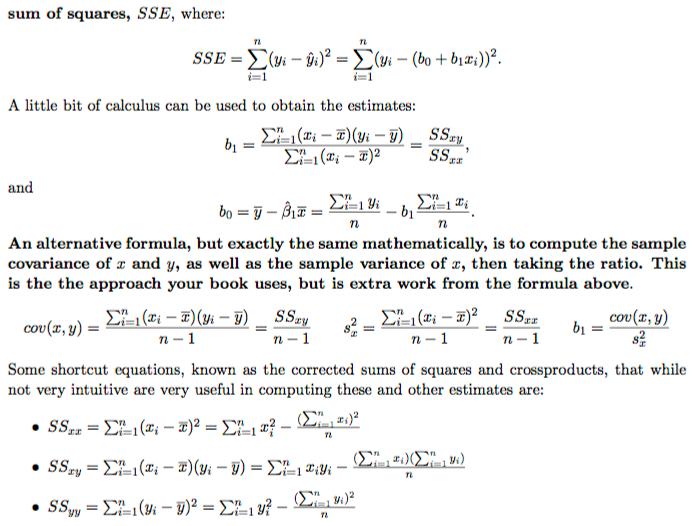

In [4]:
# how to choose alpha and beta?

# 1. compute the error terms for each pair: error = (y_i - y_pred)
def error(alpha, beta, x_i, y_i):
    """the error from predicting beta * x_i + alpha
    when the actual value is y_i"""
    return y_i - predict(alpha, beta, x_i)

# 2. compute the total error of the entire data set.
# take the squared errors in order to prevent that the errors compensate each other (+ compensates -)
def sum_of_squared_errors(alpha, beta, x, y):
    return sum(error(alpha, beta, x_i, y_i) ** 2
              for x_i, y_i in zip(x, y))

# 3. and choose the alpha and beta that make the sum of squared errors (SSE) as small as possible
# method is called: least squares solution
def least_squares_fit(x, y):
    """given training values for x and y,
    find the least-squares values of alpha and beta"""

    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/sum-of-squared-error.png')

In [1]:
# # EXAMPLE

import pandas as pd

worldbank_data = pd.read_csv('https://d37djvu3ytnwxt.cloudfront.net/assets/courseware/v1/1e732b84dd39b51e4ad5b3f7ab84a964/asset-v1:MITx+14.740x+3T2016+type@asset+block/wb_dev_ind.csv')
worldbank_data = worldbank_data.dropna()
print worldbank_data.head()

  countrycode           countryname  gdp_per_capita  literacy_female  \
2         AFG           Afghanistan       415.00348        17.612062   
3         AGO                Angola      2737.87710        59.147549   
4         ALB               Albania      4090.86490        95.691483   
5         ARE  United Arab Emirates     25140.75700        91.474747   
6         ARG             Argentina      6195.38490        97.950249   

   literacy_male  literacy_all  infant_mortality  
2      45.417099     31.741117              70.2  
3      82.474831     70.580368             101.6  
4      98.008163     96.845299              13.3  
5      89.482101     90.033844               7.0  
6      97.879501     97.916092              11.9  


In [ ]:
worldbank_data_matrix = worldbank_data.as_matrix()
literacy_all = worldbank_data['literacy_all'].tolist()
literacy_female= worldbank_data['literacy_female'].tolist()
literacy_male = worldbank_data['literacy_male'].tolist()
gdp_per_capita = worldbank_data['gdp_per_capita'].tolist()
infant_mortality = worldbank_data['infant_mortality'].tolist()

In [6]:
# worldbank_data['literacy_all'] = worldbank_data['literacy_all'].fillna(worldbank_data['literacy_all'].mean())
# worldbank_data['literacy_female'] = worldbank_data['literacy_female'].fillna(worldbank_data['literacy_female'].mean())
# worldbank_data['literacy_male'] = worldbank_data['literacy_male'].fillna(worldbank_data['literacy_male'].mean())
# worldbank_data['gdp_per_capita'] = worldbank_data['gdp_per_capita'].fillna(worldbank_data['gdp_per_capita'].mean())
# worldbank_data['infant_mortality'] = worldbank_data['infant_mortality'].fillna(worldbank_data['infant_mortality'].mean())

In [7]:
print worldbank_data.head()

  countrycode  countryname  gdp_per_capita  literacy_female  literacy_male  \
0         ABW        Aruba     19912.75700        96.719780      96.940529   
1         ADO      Andorra     35628.41100        78.544572      85.918455   
2         AFG  Afghanistan       415.00348        17.612062      45.417099   
3         AGO       Angola      2737.87710        59.147549      82.474831   
4         ALB      Albania      4090.86490        95.691483      98.008163   

   literacy_all  infant_mortality  
0     96.822639         25.611458  
1     82.151227          2.200000  
2     31.741117         70.200000  
3     70.580368        101.600000  
4     96.845299         13.300000  


In [8]:
# remove nan values for infant mortality
infant_mortality2 = []
for value in infant_mortality:
    if not math.isnan(value):
        infant_mortality2.append(value)

# remove nan values for gdp_per_capita
gdp_per_capita2 = []
for value in gdp_per_capita:
    if not math.isnan(value):
        gdp_per_capita2.append(value)

# remove nan values for infant mortality
literacy_all2 = []
for value in literacy_all:
    if not math.isnan(value):
        literacy_all2.append(value)

In [9]:
# calculate the alpha and beta for the least squares fit that predicts 
# gdp per capita based on the total litteracy rate for a selection of African countries
alpha, beta = least_squares_fit(literacy_all2, gdp_per_capita2)
print alpha
print beta
print "---"
print "y = 1605 + 138 * x"

1604.95341194
138.308450406
---
y = 1605 + 138 * x


# Determine the fit of the model

    The coefficient of determination, R-squared, measures the fraction of the total variation in the dependent
    variable that is captured by the model.

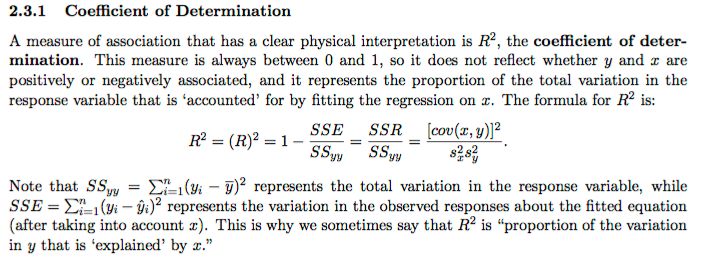

In [10]:
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/r-squared.png')

In [11]:
def total_sum_of_squares(y):
    """the total squared variation of y_i's from their mean"""
    return sum(v ** 2 for v in de_mean(y))

def r_squared(alpha, beta, x, y):
    """the fraction of variation in y captured by the model, which equals
    1 - the fraction of variation in y not captured by the model"""
    return 1.0 - (sum_of_squared_errors(alpha, beta, x, y) /
                 total_sum_of_squares(y))

In [12]:
alpha, beta = least_squares_fit(literacy_all2, gdp_per_capita2)

print "r-squared for literacy on gdp per capita: ", r_squared(alpha, beta, literacy_all2, gdp_per_capita2)

r-squared for literacy on gdp per capita:  0.111133245937


# Using Gradient Descent for linear regression

In [13]:
# when writing theta = [alpha, beta], thenwe can also solve a simple linear regression with gradient descent
def squared_error(x_i, y_i, theta):
    alpha, beta = theta
    return error(alpha, beta, x_i, y_i) ** 2

def squared_error_gradient(x_i, y_i, theta):
    alpha, beta = theta 
    return [-2 * error(alpha, beta, x_i, y_i),      # alpha partial derivative
           -2 * error(alpha, beta, x_i, y_i) * x_i] # beta partial derivative

# choose random value to start
random.seed(0)
theta = [random.random(), random.random()]
alpha, beta = minimize_stochastic(squared_error,
                                 squared_error_gradient,
                                 literacy_all2,
                                 gdp_per_capita2,
                                 theta,
                                 0.0001)
print "alpha: ", alpha
print "beta: ", beta

alpha:  1313.14564317
beta:  159.52922768


# Example of Simple Linear Regression
Worldbank dataset

In [14]:
import graphlab

In [15]:
worldbank_data_sf = graphlab.SFrame.read_csv('https://d37djvu3ytnwxt.cloudfront.net/assets/courseware/v1/1e732b84dd39b51e4ad5b3f7ab84a964/asset-v1:MITx+14.740x+3T2016+type@asset+block/wb_dev_ind.csv')
worldbank_data_sf = worldbank_data_sf.dropna()

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1477613942.log
INFO:graphlab.cython.cy_server:GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1477613942.log


Downloading https://d37djvu3ytnwxt.cloudfront.net/assets/courseware/v1/1e732b84dd39b51e4ad5b3f7ab84a964/asset-v1:MITx+14.740x+3T2016+type@asset+block/wb_dev_ind.csv to /var/tmp/graphlab-annalie/10601/aafdf7bc-96a9-409c-9796-2e22f6e0ebb5.csv

Finished parsing file https://d37djvu3ytnwxt.cloudfront.net/assets/courseware/v1/1e732b84dd39b51e4ad5b3f7ab84a964/asset-v1:MITx+14.740x+3T2016+type@asset+block/wb_dev_ind.csv

Parsing completed. Parsed 100 lines in 0.028443 secs.

This non-commercial license of GraphLab Create for academic use is assigned to annaliakruseman@gmail.com and will expire on August 25, 2017.
------------------------------------------------------

Finished parsing file https://d37djvu3ytnwxt.cloudfront.net/assets/courseware/v1/1e732b84dd39b51e4ad5b3f7ab84a964/asset-v1:MITx+14.740x+3T2016+type@asset+block/wb_dev_ind.csv

Parsing completed. Parsed 214 lines in 0.012807 secs.


Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


In [16]:
print len(worldbank_data_sf)
worldbank_data_sf.head(n=5)

214


countrycode,countryname,gdp_per_capita,literacy_female,literacy_male,literacy_all,infant_mortality
ABW,Aruba,19912.757,96.71978,96.940529,96.822639,None
ADO,Andorra,35628.411,None,None,None,2.2
AFG,Afghanistan,415.00348,17.612062,45.417099,31.741117,70.2
AGO,Angola,2737.8771,59.147549,82.474831,70.580368,101.6
ALB,Albania,4090.8649,95.691483,98.008163,96.845299,13.3


In [17]:
mean(literacy_all)

nan

In [18]:
# worldbank_data_sf['literacy_all'] = worldbank_data_sf['literacy_all'].fillna(worldbank_data_sf['literacy_all'].mean())
# worldbank_data_sf['literacy_female'] = worldbank_data_sf['literacy_female'].fillna(worldbank_data_sf['literacy_female'].mean())
# worldbank_data_sf['literacy_male'] = worldbank_data_sf['literacy_male'].fillna(worldbank_data_sf['literacy_male'].mean())
# worldbank_data_sf['gdp_per_capita'] = worldbank_data_sf['gdp_per_capita'].fillna(worldbank_data_sf['gdp_per_capita'].mean())
# worldbank_data_sf['infant_mortality'] = worldbank_data_sf['infant_mortality'].fillna(worldbank_data_sf['infant_mortality'].mean())

In [19]:
graphlab.canvas.set_target('ipynb')
worldbank_data_sf.show(view="Scatter Plot", x="literacy_all", y="gdp_per_capita")

In [23]:
# fit a regression model of literacy all on gdp per capita
# use the data set without missing values
literacy_model = graphlab.linear_regression.create(worldbank_data_sf,
                                                   target = 'gdp_per_capita',
                                                   features = ['literacy_all'],
                                                   validation_set = None,
                                                   verbose = False)

# plot the model
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(worldbank_data_sf['literacy_all'],worldbank_data_sf['gdp_per_capita'],'.',
         worldbank_data_sf['literacy_all'],literacy_model.predict(worldbank_data_sf),'-')

NameError: name 'worldbank_data_sf' is not defined

In [21]:
# get coefficients
literacy_model.get('coefficients')

name,index,value,stderr
(intercept),None,-2368.60941759,6626.82964141
literacy_all,None,186.677330447,78.9651505697


In [22]:
# remove all the values where literacy_all = 82.1512267013
worldbank_data_sf_2 = worldbank_data_sf[worldbank_data_sf['literacy_all'] != 82.1512267013] 
# worldbank_data_sf_2 = worldbank_data[worldbank_data['literacy_all'] != 82.1512267013]

In [23]:
worldbank_data_sf_2[worldbank_data_sf_2['literacy_all'] == 82.1512267013].print_rows(num_rows=214, num_columns=7)

+-------------+-------------+----------------+-----------------+
| countrycode | countryname | gdp_per_capita | literacy_female |
+-------------+-------------+----------------+-----------------+
+-------------+-------------+----------------+-----------------+
+---------------+--------------+------------------+
| literacy_male | literacy_all | infant_mortality |
+---------------+--------------+------------------+
+---------------+--------------+------------------+
[0 rows x 7 columns]



In [24]:
print len(worldbank_data_sf_2)
worldbank_data_sf_2.head()

214


countrycode,countryname,gdp_per_capita,literacy_female,literacy_male,literacy_all,infant_mortality
ABW,Aruba,19912.757,96.71978,96.940529,96.822639,25.6114583333
ADO,Andorra,35628.411,78.5445716195,85.9184552013,82.1512267013,2.2
AFG,Afghanistan,415.00348,17.612062,45.417099,31.741117,70.2
AGO,Angola,2737.8771,59.147549,82.474831,70.580368,101.6
ALB,Albania,4090.8649,95.691483,98.008163,96.845299,13.3
ARE,United Arab Emirates,25140.757,91.474747,89.482101,90.033844,7.0
ARG,Argentina,6195.3849,97.950249,97.879501,97.916092,11.9
ARM,Armenia,2309.7085,99.500771,99.71891,99.609947,14.0
ASM,American Samoa,12967.162276,78.5445716195,85.9184552013,82.1512267013,25.6114583333
ATG,Antigua and Barbuda,11481.385,99.419998,98.400002,98.949997,7.7


In [25]:
worldbank_data_sf_2.dropna()
len(worldbank_data_sf_2)
worldbank_data_sf_2.head()

countrycode,countryname,gdp_per_capita,literacy_female,literacy_male,literacy_all,infant_mortality
ABW,Aruba,19912.757,96.71978,96.940529,96.822639,25.6114583333
ADO,Andorra,35628.411,78.5445716195,85.9184552013,82.1512267013,2.2
AFG,Afghanistan,415.00348,17.612062,45.417099,31.741117,70.2
AGO,Angola,2737.8771,59.147549,82.474831,70.580368,101.6
ALB,Albania,4090.8649,95.691483,98.008163,96.845299,13.3
ARE,United Arab Emirates,25140.757,91.474747,89.482101,90.033844,7.0
ARG,Argentina,6195.3849,97.950249,97.879501,97.916092,11.9
ARM,Armenia,2309.7085,99.500771,99.71891,99.609947,14.0
ASM,American Samoa,12967.162276,78.5445716195,85.9184552013,82.1512267013,25.6114583333
ATG,Antigua and Barbuda,11481.385,99.419998,98.400002,98.949997,7.7


In [26]:
print len(worldbank_data_sf_2)
worldbank_data_sf_2['gdp_per_capita']

214


dtype: float
Rows: 214
[19912.757, 35628.411, 415.00348, 2737.8771, 4090.8649, 25140.757, 6195.3849, 2309.7085, 12967.162275979901, 11481.385, 37488.913, 41246.567, 3252.8278, 155.24535, 37559.436, 582.85765, 510.21443, 621.10545, 4807.6875, 17502.192, 20746.861, 3403.5352, 4913.5178, 4103.8941, 70600.976, 1323.1246, 5823.0438, 14349.553, 24184.672, 1976.5533, 7027.2503, 282.57107, 37524.315, 59055.414, 62648.667, 9728.4812, 3583.3759, 1079.3857, 989.27112, 1960.5787, 4394.0666, 612.73997, 2739.3241, 5839.2519, 5049.5874, 12967.162275979901, 12967.162275979901, 20516.783, 14637.504, 39219.367, 1182.516, 5997.7729, 47230.125, 4884.0665, 3243.9901, 3700.5261, 1566.5408, 196.63307, 25134.358, 11997.11, 294.77576, 39086.469, 3825.4282, 35620.144, 35211.553, 2341.4948, 6937.7129, 40231.021, 2164.9629, 769.28258, 307.39571, 450.14362, 432.92979, 12280.024, 18221.506, 6401.2538, 31625.819, 2340.7766, 12967.162275979901, 1336.3414, 33534.278, 1577.1547, 10563.108, 473.29787, 11429.856, 1810.31

In [27]:
worldbank_data_sf_2 = worldbank_data_sf[worldbank_data_sf['gdp_per_capita'] != 'None']

In [28]:
print len(worldbank_data_sf_2)
worldbank_data_sf_2['gdp_per_capita']

214


dtype: float
Rows: 214
[19912.757, 35628.411, 415.00348, 2737.8771, 4090.8649, 25140.757, 6195.3849, 2309.7085, 12967.162275979901, 11481.385, 37488.913, 41246.567, 3252.8278, 155.24535, 37559.436, 582.85765, 510.21443, 621.10545, 4807.6875, 17502.192, 20746.861, 3403.5352, 4913.5178, 4103.8941, 70600.976, 1323.1246, 5823.0438, 14349.553, 24184.672, 1976.5533, 7027.2503, 282.57107, 37524.315, 59055.414, 62648.667, 9728.4812, 3583.3759, 1079.3857, 989.27112, 1960.5787, 4394.0666, 612.73997, 2739.3241, 5839.2519, 5049.5874, 12967.162275979901, 12967.162275979901, 20516.783, 14637.504, 39219.367, 1182.516, 5997.7729, 47230.125, 4884.0665, 3243.9901, 3700.5261, 1566.5408, 196.63307, 25134.358, 11997.11, 294.77576, 39086.469, 3825.4282, 35620.144, 35211.553, 2341.4948, 6937.7129, 40231.021, 2164.9629, 769.28258, 307.39571, 450.14362, 432.92979, 12280.024, 18221.506, 6401.2538, 31625.819, 2340.7766, 12967.162275979901, 1336.3414, 33534.278, 1577.1547, 10563.108, 473.29787, 11429.856, 1810.31

In [29]:
# refit the model without the removed values
worldbank_data_sf_2.show(view="Scatter Plot", x="literacy_all", y="gdp_per_capita")

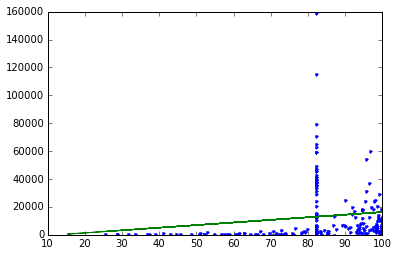

In [30]:
literacy_model_2 = graphlab.linear_regression.create(worldbank_data_sf_2,
                                                     target='gdp_per_capita',
                                                     features=['literacy_all'],
                                                     validation_set=None,
                                                     verbose=False)

plt.plot(worldbank_data_sf_2['literacy_all'], worldbank_data_sf_2['gdp_per_capita'],'.',
         worldbank_data_sf_2['literacy_all'], literacy_model_2.predict(worldbank_data_sf_2),'-')

In [31]:
literacy_model_2.get('coefficients')

name,index,value,stderr
(intercept),None,-2368.60941759,6626.82964141
literacy_all,None,186.677330447,78.9651505697


# Example 2
Predict house prices based on the square feet of the living room

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='whitegrid', context='notebook')

In [33]:
sales = pd.read_csv('/Users/annalie/Dev/regression/kc_house_data.csv')
sales.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500,3,2.25,1715,6819,2,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850,3,1.50,1060,9711,1,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500,3,1.00,1780,7470,1,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000,3,2.50,1890,6560,2,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [34]:
# split data into training and test set
train_data = pd.read_csv('/Users/annalie/Dev/regression/kc_house_train_data.csv')
test_data = pd.read_csv('/Users/annalie/Dev/regression/kc_house_test_data.csv')

In [35]:
prices = sales['price'] # extract the price column of the sales DataFrame -- this is now an Series

sum_prices = prices.sum()
num_houses = prices.size # when prices is an Series .size returns its length
avg_price_1 = sum_prices / num_houses
avg_price_2 = prices.mean() # or use the .mean() function
print("average price via method 1: ", avg_price_1)
print("average price via method 2: ", avg_price_2)

('average price via method 1: ', 540088.14176652941)
('average price via method 2: ', 540088.14176652941)


In [36]:
# compute the sum of squares of the house prices
prices_squared = prices*prices
sum_prices_squared = prices_squared.sum()
print "the sum of price squared is: ", sum_prices_squared

the sum of price squared is:  9.21732513847e+15


In [37]:
# compute the simple linear regression slope and intercept
def simple_linear_regression(input_feature, output):    
    N = output.size
    
    # compute the mean of  input_feature and output
    
    # compute the product of the output and the input_feature and its mean
    input_output_prod = input_feature * output
    
    # compute the squared value of the input_feature and its mean
    input_squared = input_feature * input_feature
    
    # use the formula for the slope
    slope = (input_output_prod.sum() - (input_feature.sum() * output.sum())/N) / (input_squared.sum() - (input_feature.sum() * input_feature.sum())/N)
    
    # use the formula for the intercept
    intercept = output.mean() - slope * input_feature.mean()
    return (intercept, slope)

In [38]:
# test the function
test_feature = np.array(range(2))
test_output = np.array(1 + 1*test_feature)

test_intercept, test_slope =  simple_linear_regression(test_feature, test_output)
print("Intercept: ", test_intercept)
print("Slope: ", test_slope)

print test_feature
print test_output

('Intercept: ', 1.0)
('Slope: ', 1.0)
[0 1]
[1 2]


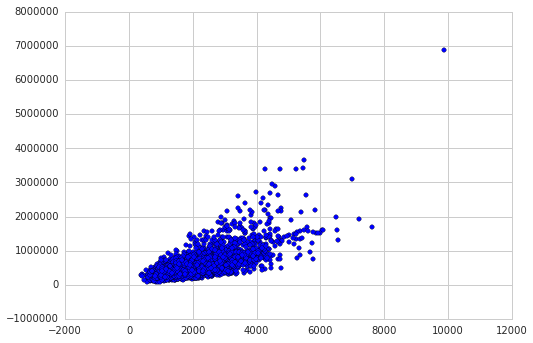

In [39]:
# make a scatter plot of sqft_living against the house price
plt.figure()
plt.scatter(x=test_data[['sqft_living']], y=test_data['price'], marker='o', c='b')

In [40]:
# build a regression model for predicting the house price based on sqft_living
sqft_intercept, sqft_slope = simple_linear_regression(train_data['sqft_living'], train_data['price'])

print "Intercept: " + str(sqft_intercept)
print "Slope: " + str(sqft_slope)
print "---"
print "y = -47116.0790729 + 281.95883963 X"

Intercept: -47116.0790729
Slope: 281.95883963
---
y = -47116.0790729 + 281.95883963 X


In [41]:
# predict the prices based on the model
def get_regression_predictions(input_feature, intercept, slope):
    predicted_values = intercept + slope * input_feature
    return predicted_values

In [42]:
# example of predicted house price with a sqft_living of 2650
input_feature_sqft_living = 2650
estimated_price = get_regression_predictions(input_feature_sqft_living, sqft_intercept, sqft_slope)
print "price for a house with 2650 sqft: ", estimated_price

price for a house with 2650 sqft:  700074.845948


In [43]:
# evaluate the model with the residual sum of squares
def get_residual_sum_of_squares(input_feature, output, intercept, slope):
    # get the predictions
    predicted_values = intercept + slope * input_feature
    # compute the residuals (since we are squaring it doesn't matter which order you subtract)
    residuals = output - predicted_values
    # square the residuals and add them up
    residuals_squared = residuals * residuals
    RSS = residuals_squared.sum()
    return(RSS)

In [44]:
# test the residual sum of squares for the test features and output that lie exactly on the line.
test_rss = get_residual_sum_of_squares(test_feature, test_output, test_intercept, test_slope) # should be 0.0
test_rss

0.0

In [45]:
# calculate the residual sum of square of the model that predicted the price based on the sqft_living
rss_prices_on_sqft = get_residual_sum_of_squares(train_data['sqft_living'], train_data['price'], sqft_intercept, sqft_slope)
rss_prices_on_sqft

1201918354177283.0

In [46]:
# predict the sqft_living based on the house price
def inverse_regression_predictions(output, intercept, slope):
    # solve output = intercept + slope * input_feature for input_feature
    estimated_feature = (output - intercept) / slope
    return estimated_feature

In [47]:
# calculater the estimated sqft_living (= estimated feature) for a house with a price of 800000 
my_house_price = 800000
estimated_squarefeet = inverse_regression_predictions(my_house_price, sqft_intercept, sqft_slope)
print "sqft_living for a house with a price of 800000: ", estimated_squarefeet

sqft_living for a house with a price of 800000:  3004.39624515


# Multiple Regression

In [27]:
from __future__ import division
from collections import Counter
from functools import partial
from linear_algebra import dot, vector_add
from statistics import median, standard_deviation
from probability import normal_cdf
from gradient_descent import minimize_stochastic
from simple_linear_regression import total_sum_of_squares
import math, random

    Multiple regression is very similar to the simple linear regression, except that x is not a single number but
    rather a vector of k numbers, as well is beta.
    
    beta = [alpha, beta_1, ..., beta_k]
    x_i = [1, x_i1, ..., x_ik]
    
    vector[y] = vector [beta] * vector [x_i]

In [49]:
def predict(x_i, beta):
    """assumes that the first element of each x_i is 1"""
    return dot(x_i, beta)

    Assumptions for least squares model for multiple regression:
    
    1. the variables x are linearly independent
    2. the variables x are uncorrelated with the errors

# Fitting the model

In [50]:
def error(x_i, y_u, beta):
    return y_i - predict(x_i, beta)

def squared_error(x_i, y_i, beta):
    return error(x_i, y_i, beta) ** 2

# find the derivative of squared_error with gradient descent
def squared_error_gradient(x_i, y_i, beta):
    """the gradient (with respect to beta)
    corresponding to the ith squared error term"""
    return [-2 * x_ij * error(x_i, y_i, beta)
           for x_ij in x_i]

# find the optimal beta
def estimate_beta(x, y):
    beta_initial = [random.random() for x_i in x[0]]
    return minimize_stochastic(squared_error,
                              squared_error_gradient,
                              x, y,
                              beta_initial,
                              0.001)

In [51]:
x = [[1,49,4,0],[1,41,9,0],[1,40,8,0],[1,25,6,0],[1,21,1,0],[1,21,0,0],[1,19,3,0],[1,19,0,0],[1,18,9,0],[1,18,8,0],[1,16,4,0],[1,15,3,0],[1,15,0,0],[1,15,2,0],[1,15,7,0],[1,14,0,0],[1,14,1,0],[1,13,1,0],[1,13,7,0],[1,13,4,0],[1,13,2,0],[1,12,5,0],[1,12,0,0],[1,11,9,0],[1,10,9,0],[1,10,1,0],[1,10,1,0],[1,10,7,0],[1,10,9,0],[1,10,1,0],[1,10,6,0],[1,10,6,0],[1,10,8,0],[1,10,10,0],[1,10,6,0],[1,10,0,0],[1,10,5,0],[1,10,3,0],[1,10,4,0],[1,9,9,0],[1,9,9,0],[1,9,0,0],[1,9,0,0],[1,9,6,0],[1,9,10,0],[1,9,8,0],[1,9,5,0],[1,9,2,0],[1,9,9,0],[1,9,10,0],[1,9,7,0],[1,9,2,0],[1,9,0,0],[1,9,4,0],[1,9,6,0],[1,9,4,0],[1,9,7,0],[1,8,3,0],[1,8,2,0],[1,8,4,0],[1,8,9,0],[1,8,2,0],[1,8,3,0],[1,8,5,0],[1,8,8,0],[1,8,0,0],[1,8,9,0],[1,8,10,0],[1,8,5,0],[1,8,5,0],[1,7,5,0],[1,7,5,0],[1,7,0,0],[1,7,2,0],[1,7,8,0],[1,7,10,0],[1,7,5,0],[1,7,3,0],[1,7,3,0],[1,7,6,0],[1,7,7,0],[1,7,7,0],[1,7,9,0],[1,7,3,0],[1,7,8,0],[1,6,4,0],[1,6,6,0],[1,6,4,0],[1,6,9,0],[1,6,0,0],[1,6,1,0],[1,6,4,0],[1,6,1,0],[1,6,0,0],[1,6,7,0],[1,6,0,0],[1,6,8,0],[1,6,4,0],[1,6,2,1],[1,6,1,1],[1,6,3,1],[1,6,6,1],[1,6,4,1],[1,6,4,1],[1,6,1,1],[1,6,3,1],[1,6,4,1],[1,5,1,1],[1,5,9,1],[1,5,4,1],[1,5,6,1],[1,5,4,1],[1,5,4,1],[1,5,10,1],[1,5,5,1],[1,5,2,1],[1,5,4,1],[1,5,4,1],[1,5,9,1],[1,5,3,1],[1,5,10,1],[1,5,2,1],[1,5,2,1],[1,5,9,1],[1,4,8,1],[1,4,6,1],[1,4,0,1],[1,4,10,1],[1,4,5,1],[1,4,10,1],[1,4,9,1],[1,4,1,1],[1,4,4,1],[1,4,4,1],[1,4,0,1],[1,4,3,1],[1,4,1,1],[1,4,3,1],[1,4,2,1],[1,4,4,1],[1,4,4,1],[1,4,8,1],[1,4,2,1],[1,4,4,1],[1,3,2,1],[1,3,6,1],[1,3,4,1],[1,3,7,1],[1,3,4,1],[1,3,1,1],[1,3,10,1],[1,3,3,1],[1,3,4,1],[1,3,7,1],[1,3,5,1],[1,3,6,1],[1,3,1,1],[1,3,6,1],[1,3,10,1],[1,3,2,1],[1,3,4,1],[1,3,2,1],[1,3,1,1],[1,3,5,1],[1,2,4,1],[1,2,2,1],[1,2,8,1],[1,2,3,1],[1,2,1,1],[1,2,9,1],[1,2,10,1],[1,2,9,1],[1,2,4,1],[1,2,5,1],[1,2,0,1],[1,2,9,1],[1,2,9,1],[1,2,0,1],[1,2,1,1],[1,2,1,1],[1,2,4,1],[1,1,0,1],[1,1,2,1],[1,1,2,1],[1,1,5,1],[1,1,3,1],[1,1,10,1],[1,1,6,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,4,1],[1,1,9,1],[1,1,9,1],[1,1,4,1],[1,1,2,1],[1,1,9,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,1,1],[1,1,1,1],[1,1,5,1]]
num_friends_good = [49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
daily_minutes_good = [68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

# Goodness of Fit

In [52]:
# r-square is again used to measure the goodness of fit for the complete model
def multiple_r_squared(x, y, beta):
    sum_of_squared_errors = sum(error(x_i, y_i, beta) ** 2
                                for x_i, y_i in zip(x, y))
    return 1.0 - sum_of_squared_errors / total_sum_of_squares(y)

    Adding new variables to a regression will increase the R-squared.
    After all, the simple regression model is just the special case of the multiple regression model where the
    coefficients on the variables that don't contribute anymore to the model equal 0. The optimal multiple
    regression model will necessarily have an error at least as small as that one.
    
    Because of this, in a multiple regression, we also need to look at the standard errors of the coefficients,
    which measure how certain we are about our estimates of each beta_i. The regression as a whole may fit the data very well, but if some of the independent variables are correlated (or irrelevant), their coefficients might not mean much.
    
    In order to be certain that the variables are uncorrelated, and the standard errors of the coefficients are not too large, we add another assumption to multiple regression:
    
    3. the standard errors of the coefficients are independent normal random variables with mean 0 and some shared (unknown) standard deviation sigma, σ.

# Estimating the Standard Errors of the regression coefficient with the Bootstrap method

    By taking a bootstrap from the sample we compare the coefficients over different samples from the same data set
    If the coefficient corresponding to one of the independent variables doesn’t vary much across samples, then we can be confident that our estimate is relatively tight. If the coefficient varies greatly across samples, then we can’t be at all confident in our estimate.

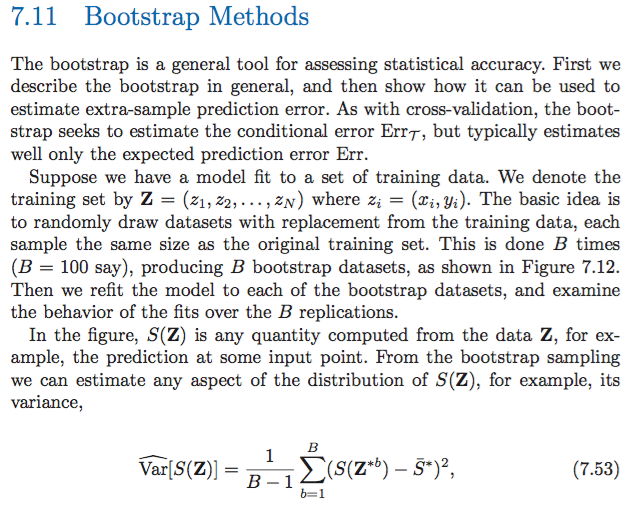

In [53]:
from IPython.display import Image
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/bootstrap.png')

In [54]:
# example of bootstrap
data = worldbank_data_matrix

In [55]:
def bootstrap_sample(data):
    """randomly samples len(data) elements with replacement"""
    return [random.choice(data) for _ in data]
    
def bootstrap_statistic(data, stats_fn, num_samples):
    """evaluates stats_fn on num_samples bootstrap samples from data"""
    return [stats_fn(bootstrap_sample(data)) 
            for _ in range(num_samples)]

In [56]:
# 101 points all very close to 100
close_to_100 = [99.5 + random.random() for _ in range(101)]
print close_to_100[:5]

# 101 points, 50 of them near 0, 50 of them near 200
far_from_100 = ([99.5 + random.random()] +
                [random.random() for _ in range(50)] + 
                [200 + random.random() for _ in range(50)])
print far_from_100[:5]

[99.79293349095951, 99.6460711824214, 100.41583043962459, 99.62952119752936, 100.4566955665038]
[99.57830977214091, 0.8603684670341686, 0.5645637190569054, 0.1480819124890651, 0.6247026238932203]


In [57]:
# difference between median from sample and median from bootstrap
print median(close_to_100)
print bootstrap_statistic(close_to_100, median, 100)[:5]

99.9999796984
[99.99997969841931, 99.92436913821513, 100.00855692440085, 100.00861280477721, 99.97859163802518]


In [58]:
# difference between median from sample and median from bootstrap
print median(far_from_100)
print bootstrap_statistic(far_from_100, median, 100)[:5]

99.5783097721
[200.0189613075284, 200.2912773599806, 200.12355512945348, 99.57830977214091, 200.22798886407617]


In [59]:
# bootstrap to estimate beta's
# 1. zip the x data and y data to make sure that corresponding values of 
# the independent and dependent variables are sampled together.

def estimate_sample_beta(sample):
    """sample is a list of pairs (x_i, y_i)"""
    x_sample, y_sample = zip(*sample) # magic unzipping trick return estimate_beta(x_sample, y_sample)

In [60]:
bootstrap_betas = bootstrap_statistic(zip(x, daily_minutes_good),
                                      estimate_sample_beta,
                                      100)

In [61]:
# and estimate the standard deviation of each coefficient
bootstrap_standard_errors = [
    standard_deviation([beta[i] for beta in bootstrap_betas]) 
    for i in range(4)]

TypeError: 'NoneType' object has no attribute '__getitem__'

    These beta's and standard errors can be used to test hypotheses, e.g. “does βi equal zero?” under the null hypothesis βi = 0 and the t-statistic: 
    
    tj = βj/σj
    
    The t-test follows t-distribution with “n − k degrees of freedom.”
    We can use the p-value to indicate how likely we would be to observe such a value if the actual coefficient were zero.

In [62]:
def p_value(beta_hat_j, sigma_hat_j):
    if beta_hat_j > 0:
        return 2 * (1 - normal_cdf(beta_hat_j / sigma_hat_j))
    else:
        return 2 * normal_cdf(beta_hat_j / sigma_hat_j)

In [63]:
# all together
def predict(x_i, beta):
    return dot(x_i, beta)

def error(x_i, y_i, beta):
    return y_i - predict(x_i, beta)
    
def squared_error(x_i, y_i, beta):
    return error(x_i, y_i, beta) ** 2

def squared_error_gradient(x_i, y_i, beta):
    """the gradient corresponding to the ith squared error term"""
    return [-2 * x_ij * error(x_i, y_i, beta)
            for x_ij in x_i]

def estimate_beta(x, y):
    beta_initial = [random.random() for x_i in x[0]]
    return minimize_stochastic(squared_error, 
                               squared_error_gradient, 
                               x, y, 
                               beta_initial, 
                               0.001)            

def multiple_r_squared(x, y, beta):
    sum_of_squared_errors = sum(error(x_i, y_i, beta) ** 2
                                for x_i, y_i in zip(x, y))
    return 1.0 - sum_of_squared_errors / total_sum_of_squares(y)

def bootstrap_sample(data):
    """randomly samples len(data) elements with replacement"""
    return [random.choice(data) for _ in data]
    
def bootstrap_statistic(data, stats_fn, num_samples):
    """evaluates stats_fn on num_samples bootstrap samples from data"""
    return [stats_fn(bootstrap_sample(data)) 
            for _ in range(num_samples)]

def estimate_sample_beta(sample):
    x_sample, y_sample = zip(*sample) # magic unzipping trick
    return estimate_beta(x_sample, y_sample)

def p_value(beta_hat_j, sigma_hat_j):
    if beta_hat_j > 0:
        return 2 * (1 - normal_cdf(beta_hat_j / sigma_hat_j))
    else:
        return 2 * normal_cdf(beta_hat_j / sigma_hat_j)

# Example multiple regression
Predict house prices based on multiple features of a house

In [5]:
import graphlab

In [6]:
sales = graphlab.SFrame('/Users/annalie/Dev/regression/kc_house_data.gl/')
sales.head(5)

worldbank_sf = graphlab.SFrame(worldbank_data)

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1477698392.log
INFO:graphlab.cython.cy_server:GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1477698392.log


This non-commercial license of GraphLab Create for academic use is assigned to annaliakruseman@gmail.com and will expire on August 25, 2017.


In [8]:
# split data into training and test set and run the linear regression model
# train_data,test_data = sales.random_split(.8,seed=0)

# features = ['sqft_living', 'bedrooms', 'bathrooms']
# model = graphlab.linear_regression.create(train_data, target = 'price', 
#                                           features = features,
#                                           validation_set = None)

train_data,test_data = worldbank_sf.random_split(.8,seed=0)

features = ['literacy_all', 'infant_mortality']
model = graphlab.linear_regression.create(train_data, target = 'gdp_per_capita', 
                                          features = features,
                                          validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 126

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 1.004173     | 49972.606945       | 7617.730074   |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [9]:
# get the coefficients of the model
weight_summary = model.get("coefficients")
print weight_summary

+------------------+-------+----------------+---------------+
|       name       | index |     value      |     stderr    |
+------------------+-------+----------------+---------------+
|   (intercept)    |  None | 6409.95752388  | 5367.93324309 |
|   literacy_all   |  None | 46.5156260261  | 52.1190370651 |
| infant_mortality |  None | -140.835983543 | 44.9566049015 |
+------------------+-------+----------------+---------------+
[3 rows x 4 columns]



In [10]:
# predict the house price based on these features
predictions = model.predict(train_data)
predictions[:5]

dtype: float
Rows: 5
[-2000.2705928144887, -4615.888401414296, 9041.658653421979, 9612.08625626911, 9288.637637121388]

In [14]:
# compute the residual sum of squares (RSS)
def get_residual_sum_of_squares(model, data, outcome):
    # get the predictions
    # since in a multiple regression there is more than one input feature, 
    # we first need to run the model to get all the slopes of the features  
    predictions = model.predict(data)
    
    # compute the residuals/errors
    residual = outcome - predictions
    
    # square and add them up
    residual_squared = residual * residual
    RSS = residual_squared.sum()

    return(RSS)   

# get the residual sum of squares
rss_train = get_residual_sum_of_squares(model, test_data, test_data['gdp_per_capita'])
print "RSS: ", rss_train

RSS:  388060102.21


# Variable reduction and Regularization

    With large numbers of variables you are more likely to overfit your model to the training set.
    
    Regularization is an approach in which we add to the error term a penalty that gets larger as beta gets larger. We then minimize the combined error and penalty. The more importance we place on the penalty term, the more we
    discourage large coefficients.

# Ridge regression from book Data Science from Scratch

    For example, in ridge regression, we add a penalty proportional to the sum of the squares of the beta_i.
    (Except that typically we don’t penalize beta_0, the constant term.)

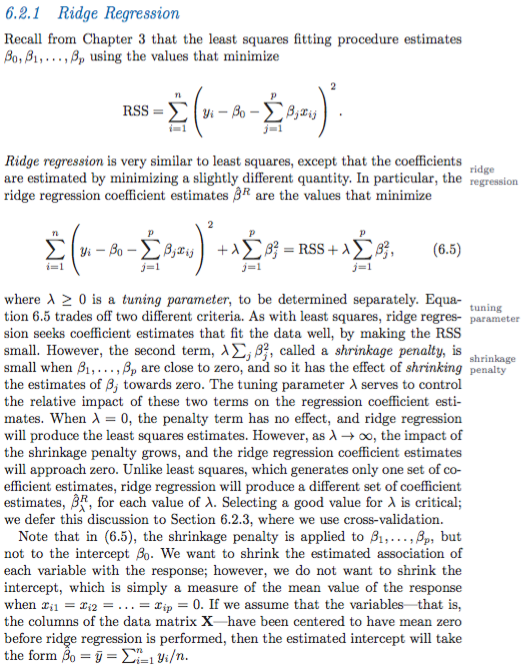

In [70]:
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/ridge-regression.png')

In [71]:
# alpha is a *hyperparameter* controlling how harsh the penalty is
# sometimes it's called "lambda" but that already means something in Python
def ridge_penalty(beta, alpha):
  return alpha * dot(beta[1:], beta[1:])

def squared_error_ridge(x_i, y_i, beta, alpha):
    """estimate error plus ridge penalty on beta"""
    return error(x_i, y_i, beta) ** 2 + ridge_penalty(beta, alpha)

def ridge_penalty_gradient(beta, alpha):
    """gradient of just the ridge penalty"""
    return [0] + [2 * alpha * beta_j for beta_j in beta[1:]]

def squared_error_ridge_gradient(x_i, y_i, beta, alpha):
    """the gradient corresponding to the ith squared error term
    including the ridge penalty"""
    return vector_add(squared_error_gradient(x_i, y_i, beta),
                      ridge_penalty_gradient(beta, alpha))

def estimate_beta_ridge(x, y, alpha):
    """use gradient descent to fit a ridge regression
    with penalty alpha"""
    beta_initial = [random.random() for x_i in x[0]]
    return minimize_stochastic(partial(squared_error_ridge, alpha=alpha), 
                               partial(squared_error_ridge_gradient, 
                                       alpha=alpha), 
                               x, y, 
                               beta_initial, 
                               0.001)

In [72]:
# When the penalty is 0, there is no difference 
random.seed(0)
beta_0 = estimate_beta_ridge(x, daily_minutes_good, alpha=0.0) # [30.6, 0.97, -1.87, 0.91]
dot(beta_0[1:], beta_0[1:]) # 5.26
multiple_r_squared(x, daily_minutes_good, beta_0) # 0.680

0.6800056770476126

In [73]:
# As we increase alpha, the goodness of fit gets worse, but the size of beta gets smaller:
print "beta_0_01"
beta_0_01 = estimate_beta_ridge(x, daily_minutes_good, alpha=0.01) 
print beta_0_01
print dot(beta_0_01[1:], beta_0_01[1:])
print multiple_r_squared(x, daily_minutes_good, beta_0_01) 
print "---"
print "beta_0_1"
beta_0_1 = estimate_beta_ridge(x, daily_minutes_good, alpha=0.1) 
print beta_0_1
print dot(beta_0_1[1:], beta_0_1[1:]) 
print multiple_r_squared(x, daily_minutes_good, beta_0_1) 
print "---"
print "beta_1"
beta_1 = estimate_beta_ridge(x, daily_minutes_good, alpha=1) 
print beta_1
print dot(beta_1[1:], beta_1[1:]) 
print multiple_r_squared(x, daily_minutes_good, beta_1) 
print "---"
print "beta_10"
beta_10 = estimate_beta_ridge(x, daily_minutes_good, alpha=10) 
print beta_10
print dot(beta_10[1:], beta_10[1:]) 

beta_0_01
[30.528551175260006, 0.9731181744366826, -1.851799008905609, 0.8915225460735687]
5.17093100096
0.679989399087
---
beta_0_1
[30.838757524394094, 0.9526782736304008, -1.8460496669152224, 0.5459697239685967]
4.61357820526
0.679738099564
---
beta_1
[30.714287723210266, 0.9042598647109694, -1.6972448793170174, 0.08360879648532481]
3.70531651414
0.675721409047
---
beta_10
[28.378859333590484, 0.7276119906687398, -0.9106830035740269, -0.017038292617451517]
1.35905304538


# Ridge regression from Machine Learning course on Regression

    However, there is a better way to choose the alpha/lambda weight via k-fold cross-validation. The method described below will build a linear regression model for which the residual sum of squares is the smallest for a specific alpha/lambda weight.
    
    See below the example with the sales data about housing prices.

In [15]:
# the data is transformed to a 15 polynomial data set
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = graphlab.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name] = feature.apply(lambda x: x**power)
    return poly_sframe

In [16]:
poly15_data = polynomial_sframe(worldbank_sf['literacy_all'], 14)

poly15_data.head(3)

Columns:
	power_1	float
	power_2	float
	power_3	float
	power_4	float
	power_5	float
	power_6	float
	power_7	float
	power_8	float
	power_9	float
	power_10	float
	power_11	float
	power_12	float
	power_13	float
	power_14	float

Rows: 3

Data:
+-----------+---------------+---------------+---------------+---------------+
|  power_1  |    power_2    |    power_3    |    power_4    |    power_5    |
+-----------+---------------+---------------+---------------+---------------+
| 31.741117 | 1007.49850841 | 31979.1280327 | 1015053.24444 | 32218923.7931 |
| 70.580368 | 4981.58834702 | 351602.338757 | 24816222.4591 | 1751538113.53 |
| 96.845299 |  9379.0119384 | 908313.215499 | 87965864.9406 | 8519080491.97 |
+-----------+---------------+---------------+---------------+---------------+
+-------------------+-------------------+-------------------+-------------------+
|      power_6      |      power_7      |      power_8      |      power_9      |
+-------------------+-------------------+-------------------+-------------------+
|   1022664629.73   |   32460517664.1   | 1.03033308906e+12 | 3.27039231287e+13 |
| 1.23624204619e+11 | 8.72544185574e+12 | 6.15844897141e+14 | 4.34665594711e+16 |
|  8.2503289745e+11 | 7.99005576384e+13 | 7.73799339475e+15 | 7.49388283975e+17 |
+-------------------+-------------------+-------------------+-------------------+
+-------------------+-------------------+-------------------+-------------------+
|      power_10     |      power_11     |      power_12     |      power_13     |
+-------------------+-------------------+-------------------+-------------------+
| 1.03805905039e+15 | 3.29491537712e+16 |  1.0458429449e+18 | 3.31962232778e+19 |
| 3.06788576316e+18 | 2.16532506146e+20 | 1.52829439678e+22 | 1.07867580937e+24 |
| 7.25747324287e+19 |  7.0285216619e+21 | 6.80679281875e+23 | 6.59205885762e+25 |
+-------------------+-------------------+-------------------+-------------------+
+-------------------+
|      power_14     |
+-------------------+
| 1.05368520702e+21 |
| 7.61333355778e+25 |
| 6.38409911092e+27 |
+-------------------+
[3 rows x 14 columns]

In [17]:
# split the data in a training and test set
train_valid, test = worldbank_sf.random_split(.9)

# create a new data set where the data is randomly shuffled with cross-validation
train_valid_shuffled = graphlab.toolkits.cross_validation.shuffle(train_valid)

In [18]:
import numpy as np
def k_fold_cross_validation(k, l2_penalty, data, output, feature_list):        
    n = len(data)
    errors = []
    for i in range(0, k):
        start = (n*i)/k
        end = (n*(i+1))/k-1
        
        validation_data = poly15_data[start:end+1]
        
        first = poly15_data[0:start]
        last = poly15_data[end+1:n]
        train_data = first.append(last)        
        
        model = graphlab.linear_regression.create(train_data, target = output, features = feature_list,
                                                  l2_penalty = l2_penalty, validation_set = None, verbose=False)
        
        # First get the predictions
        predictions = model.predict(validation_data)
        # then compute the residuals (since we are squaring it doesn't matter which order you subtract)
        residuals = validation_data[output] - predictions
        # square the residuals and add them up
        residuals_squared = residuals * residuals
        RSS = residuals_squared.sum()
        errors.append(RSS)
    average_error = np.mean(errors)
    print"l2_penalty: %s, Average RSS: $%.6f" % (l2_penalty, average_error)
    return average_error

In [19]:
# compute the average validation error for linear regression model under different weights
poly15_data = polynomial_sframe(train_valid_shuffled['literacy_all'], 14)
fifteen_features = poly15_data.column_names() # get the name of the features
poly15_data['gdp_per_capita'] = train_valid_shuffled['gdp_per_capita'] # add price to the data since it's the target
    
results = []

for l2_penalty in np.logspace(1, 7, num=13):
    average_error = k_fold_cross_validation(10, l2_penalty, train_valid_shuffled, 'gdp_per_capita', fifteen_features)
    results.append((l2_penalty, average_error))

l2_penalty: 10.0, Average RSS: $728290104.218033
l2_penalty: 31.6227766017, Average RSS: $739934705.427770
l2_penalty: 100.0, Average RSS: $751530123.237084
l2_penalty: 316.227766017, Average RSS: $769983236.108141
l2_penalty: 1000.0, Average RSS: $806873093.345026
l2_penalty: 3162.27766017, Average RSS: $843615088.742537
l2_penalty: 10000.0, Average RSS: $863121462.578601
l2_penalty: 31622.7766017, Average RSS: $870592918.148939
l2_penalty: 100000.0, Average RSS: $873112222.986502
l2_penalty: 316227.766017, Average RSS: $873925552.248250
l2_penalty: 1000000.0, Average RSS: $874184448.321722
l2_penalty: 3162277.66017, Average RSS: $874266489.408679
l2_penalty: 10000000.0, Average RSS: $874292450.206363


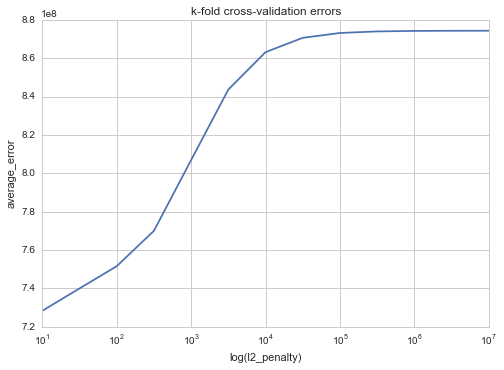

In [28]:
# plot the results: lambda against the RSS
plt.plot([x[0] for x in results], [y[1] for y in results],'-')
plt.xscale('log')
plt.xlabel('log(l2_penalty)')
plt.ylabel('average_error')
plt.title('k-fold cross-validation errors')

In [29]:
# rerun the model with the lowest error
l2_penalty_optimum = 1000.0   
model = graphlab.linear_regression.create(poly15_data, target = 'gdp_per_capita', features = fifteen_features,
                                          l2_penalty=l2_penalty_optimum, validation_set = None, verbose=False)

# get the predictions
predictions = model.predict(test)

# compute the residuals 
residuals = test['gdp_per_capita'] - predictions

# square the residuals and add them up
residuals_squared = residuals * residuals
RSS = residuals_squared.sum()
print"RSS: $%.6f" %RSS

RSS: $1381836670.890000


# Alternative ridge regression

In [30]:
# define a polynomial regression function that best fits the model

# define the features for the polynomial function
def polynomial_features(data, deg):
    data_copy = data.copy()
    for i in range(1,deg):
        data_copy['X'+str(i+1)] = data_copy['X'+str(i)] * data_copy['X1']
    return data_copy

In [31]:
# define a function to plot the data
def plot_data(data):    
    plt.plot(data['X1'],data['Y'],'k.')
    plt.xlabel('x')
    plt.ylabel('y')

def plot_poly_predictions(data, model):
    plot_data(data)

    # Get the degree of the polynomial
    deg = len(model.coefficients['value'])-1
    
    # Create 200 points in the x axis and compute the predicted value for each point
    x_pred = graphlab.SFrame({'X1':[i/200.0 for i in range(200)]})
    y_pred = model.predict(polynomial_features(x_pred,deg))
    
    # plot predictions
    plt.plot(x_pred['X1'], y_pred, 'g-', label='degree ' + str(deg) + ' fit')
    plt.legend(loc='upper left')
    plt.axis([0,1,-1.5,2])

In [32]:
# create a function that plots the polynomial coefficients
import numpy as np

def print_coefficients(model):    
    # Get the degree of the polynomial
    deg = len(model.coefficients['value'])-1

    # Get learned parameters as a list
    w = list(model.coefficients['value'])

    # Numpy has a nifty function to print out polynomials in a pretty way
    # (We'll use it, but it needs the parameters in the reverse order)
    print 'Learned polynomial for degree ' + str(deg) + ':'
    w.reverse()
    print np.poly1d(w)

In [33]:
# define a function to build a ridge regression model
def polynomial_ridge_regression(data, deg, l2_penalty):
    model = graphlab.linear_regression.create(polynomial_features(data,deg), 
                                              target='Y', l2_penalty=l2_penalty,
                                              validation_set=None,verbose=False)
    return model

In [84]:
# create a random data set
random.seed(98103)
n = 30
x = graphlab.SArray([random.random() for i in range(n)]).sort()

y = x.apply(lambda x: math.sin(4*x))

# add some noise to the data set
random.seed(1)
e = graphlab.SArray([random.gauss(0,1.0/3.0) for i in range(n)])
y = y + e

data = graphlab.SFrame({'X1':x,'Y':y})

In [37]:
x = graphlab.SArray(worldbank_sf['literacy_all'])
y = graphlab.SArray(worldbank_sf['gdp_per_capita'])
worldbank_data = graphlab.SFrame({'X1':x,'Y':y})

lambda = 1.00e-25
Learned polynomial for degree 16:
           16             15             14             13
1.203e-23 x  - 5.661e-21 x  + 9.907e-19 x  - 6.914e-17 x 
              12             11             10            9
 - 3.962e-16 x  + 3.979e-13 x  - 4.812e-11 x  + 5.71e-09 x
              8             7             6           5         4
 - 4.615e-07 x + 1.994e-05 x - 0.0007176 x + 0.07108 x - 5.998 x
          3        2
 + 270.4 x - 6587 x + 8.232e+04 x - 4.104e+05


lambda = 1.00e-10
Learned polynomial for degree 16:
            16             15             14             13
-3.073e-25 x  + 4.596e-23 x  + 1.946e-21 x  - 2.226e-19 x 
             12            11             10             9
 - 3.16e-17 x  - 7.84e-16 x  + 1.958e-13 x  + 2.275e-11 x
              8             7             6            5           4
 + 9.727e-11 x - 1.819e-07 x - 9.979e-06 x + 0.001133 x + 0.07382 x
          3         2
 - 10.14 x + 392.9 x - 6509 x + 3.947e+04


lambda = 1.00e-06
Lea

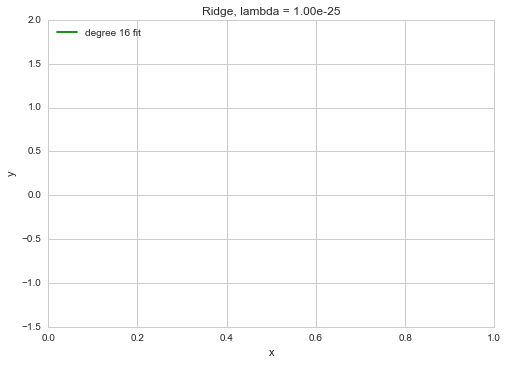

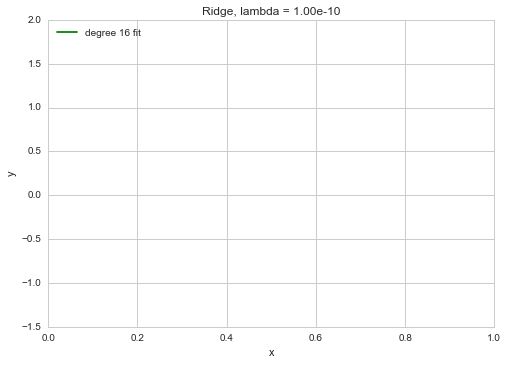

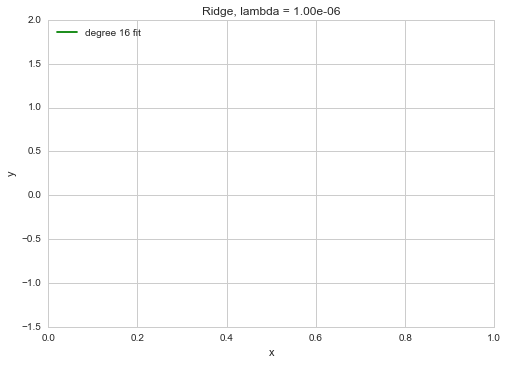

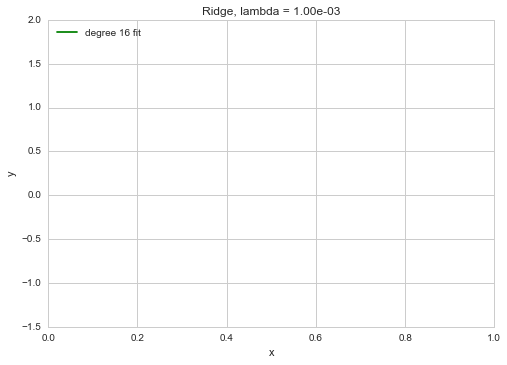

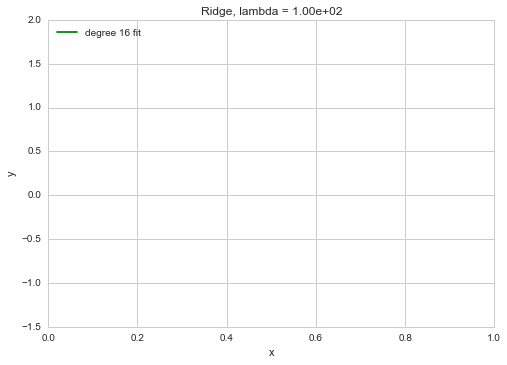

In [38]:
# look at the fits for different lambda values
for l2_penalty in [1e-25, 1e-10, 1e-6, 1e-3, 1e2]:
    model = polynomial_ridge_regression(data, deg=16, l2_penalty=l2_penalty)
    print 'lambda = %.2e' % l2_penalty
    print_coefficients(model)
    print '\n'
    plt.figure()
    plot_poly_predictions(data,model)
    plt.title('Ridge, lambda = %.2e' % l2_penalty)

In [39]:
# choose the lambda for which the error is the smallest
# LOO cross validation -- return the average MSE
def loo(data, deg, l2_penalty_values):
    # Create polynomial features
    data = polynomial_features(data, deg)
    
    # Create as many folds for cross validatation as number of data points
    num_folds = len(data)
    folds = graphlab.cross_validation.KFold(data,num_folds)
    
    # for each value of l2_penalty, fit a model for each fold and compute average MSE
    l2_penalty_mse = []
    min_mse = None
    best_l2_penalty = None
    for l2_penalty in l2_penalty_values:
        next_mse = 0.0
        for train_set, validation_set in folds:
            # train model
            model = graphlab.linear_regression.create(train_set,target='Y', 
                                                      l2_penalty=l2_penalty,
                                                      validation_set=None,verbose=False)
            
            # predict on validation set 
            y_test_predicted = model.predict(validation_set)
            # compute squared error
            next_mse += ((y_test_predicted-validation_set['Y'])**2).sum()
        
        # save squared error in list of MSE for each l2_penalty
        next_mse = next_mse/num_folds
        l2_penalty_mse.append(next_mse)
        if min_mse is None or next_mse < min_mse:
            min_mse = next_mse
            best_l2_penalty = l2_penalty
            
    return l2_penalty_mse,best_l2_penalty

In [ ]:
# run the cross-validation
l2_penalty_values = np.logspace(-4, 10, num=10)
l2_penalty_mse,best_l2_penalty = loo(data, 16, l2_penalty_values)

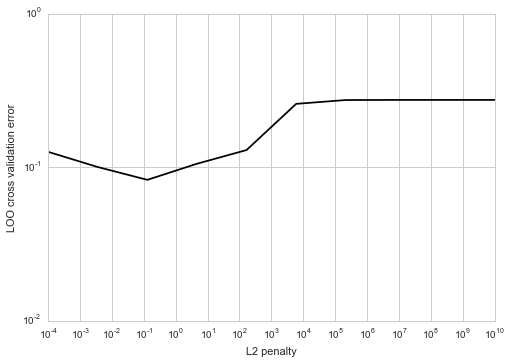

In [88]:
# plot the results
plt.plot(l2_penalty_values,l2_penalty_mse,'k-')
plt.xlabel('L2 penalty')
plt.ylabel('LOO cross validation error')
plt.xscale('log')
plt.yscale('log')

In [89]:
# run the model with the best lambda for which the RSS is the smallest
model = polynomial_ridge_regression(data, deg=16, l2_penalty=best_l2_penalty)
print_coefficients(model)

Learned polynomial for degree 16:
       16         15          14          13          12           11
1.345 x  + 1.141 x  + 0.9069 x  + 0.6447 x  + 0.3569 x  + 0.04947 x 
           10          9          8         7         6         5
 - 0.2683 x  - 0.5821 x - 0.8701 x - 1.099 x - 1.216 x - 1.145 x
           4           3          2
 - 0.7837 x - 0.07406 x + 0.7614 x + 0.7703 x + 0.3918


# Lasso

    Whereas the ridge penalty shrank the coefficients overall, the lasso penalty tends to force coefficients to be
    zero, which makes it good for learning sparse models.

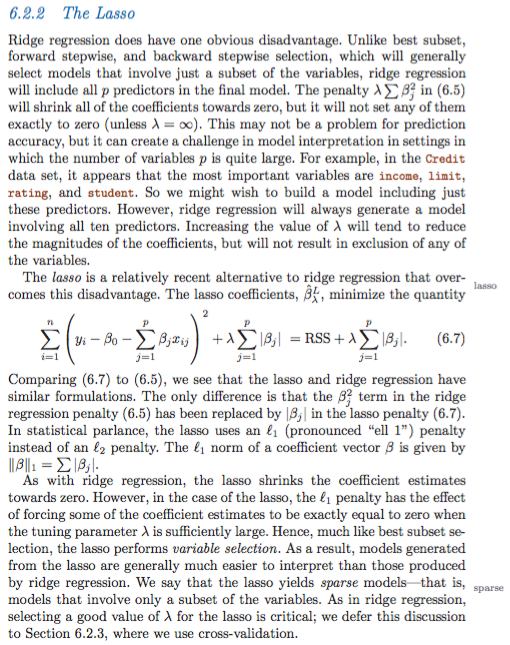

In [90]:
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/lasso.png')

In [91]:
def lasso_penalty(beta, alpha):
    return alpha * sum(abs(beta_i) for beta_i in beta[1:])

# Lasso regression from Machine Learning course on Regression

In [92]:
# define the lasso model
def polynomial_lasso_regression(data, deg, l1_penalty):
    model = graphlab.linear_regression.create(polynomial_features(data,deg), 
                                              target='Y', l2_penalty=0., # indicates the ridge regression, which is set to 0 for lasso
                                              l1_penalty=l1_penalty,
                                              validation_set=None, 
                                              solver='fista', verbose=False, 
                                              max_iterations=3000, convergence_threshold=1e-10) # difference with the ridge regression, which does not converge to 0
    return model

l1_penalty = 1.000000e-04
number of nonzeros = 17
Learned polynomial for degree 16:
       16        15         14         13         12         11
29.02 x  + 1.35 x  - 12.72 x  - 16.93 x  - 13.82 x  - 6.698 x 
          10         9         8         7         6         5
 + 1.407 x  + 8.939 x + 12.88 x + 11.44 x + 3.759 x - 8.062 x
          4         3         2
 - 16.28 x - 7.682 x + 17.86 x - 4.384 x + 0.685


l1_penalty = 1.000000e-02
number of nonzeros = 14
Learned polynomial for degree 16:
       16            15           11          10         9          8
-1.18 x  - 0.002249 x  + 0.08784 x  + 0.7393 x  + 3.829 x + 0.4766 x
           7             6          5         4             3         2
 + 0.1288 x - 0.0008621 x - 0.6146 x - 10.11 x - 0.0002693 x + 6.686 x - 1.28 x + 0.5056


l1_penalty = 1.000000e-01
number of nonzeros = 5
Learned polynomial for degree 16:
      16         6         5
2.21 x  - 1.002 x - 2.962 x + 1.216 x + 0.3473


l1_penalty = 1.000000e+01
number o

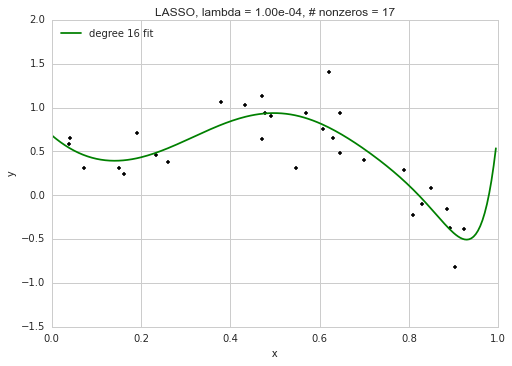

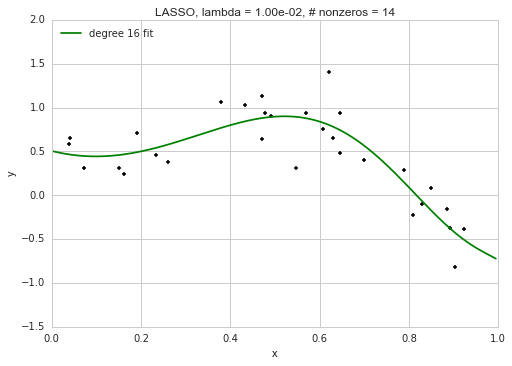

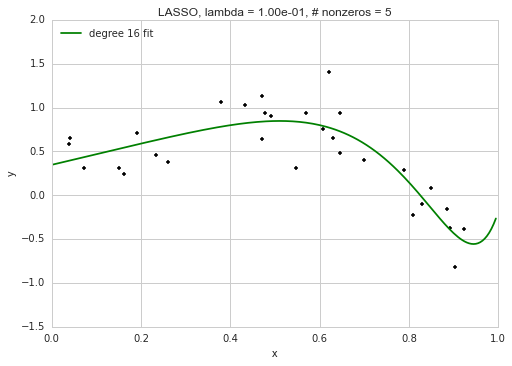

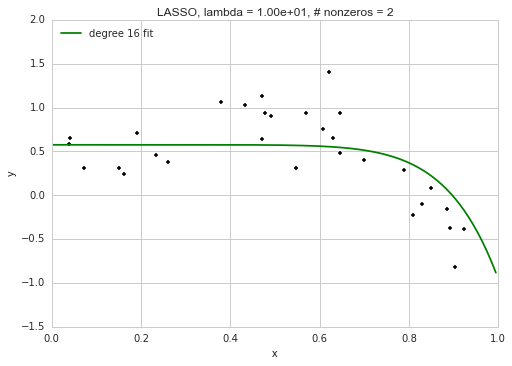

In [93]:
# explore the lasso solution as a function of a few different penalty strengths
for l1_penalty in [0.0001, 0.01, 0.1, 10]:
    model = polynomial_lasso_regression(data, deg=16, l1_penalty=l1_penalty)
    print 'l1_penalty = %e' % l1_penalty
    print 'number of nonzeros = %d' % (model.coefficients['value']).nnz()
    print_coefficients(model)
    print '\n'
    plt.figure()
    plot_poly_predictions(data,model)
    plt.title('LASSO, lambda = %.2e, # nonzeros = %d' % (l1_penalty, (model.coefficients['value']).nnz()))

In [94]:
# choose the lambda for which the error is the smallest
# LOO cross validation -- return the average MSE
def loo(data, deg, l1_penalty_values):
    # Create polynomial features
    data = polynomial_features(data, deg)
    
    # Create as many folds for cross validatation as number of data points
    num_folds = len(data)
    folds = graphlab.cross_validation.KFold(data,num_folds)
    
    # for each value of l1_penalty, fit a model for each fold and compute average MSE
    l1_penalty_mse = []
    min_mse = None
    best_l1_penalty = None
    for l1_penalty in l1_penalty_values:
        next_mse = 0.0
        for train_set, validation_set in folds:
            # train model
            model = graphlab.linear_regression.create(train_set,
                                                      target='Y', l2_penalty=0., # indicates the ridge regression, which is set to 0 for lasso
                                                      l1_penalty=l1_penalty,
                                                      validation_set=None, 
                                                      solver='fista', verbose=False, 
                                                      max_iterations=3000, convergence_threshold=1e-10)
            
            # predict on validation set 
            y_test_predicted = model.predict(validation_set)
            # compute squared error
            next_mse += ((y_test_predicted-validation_set['Y'])**2).sum()
        
        # save squared error in list of MSE for each l2_penalty
        next_mse = next_mse/num_folds
        l1_penalty_mse.append(next_mse)
        if min_mse is None or next_mse < min_mse:
            min_mse = next_mse
            best_l1_penalty = l1_penalty
            
    return l1_penalty_mse,best_l1_penalty

In [95]:
# run the cross-validation
l1_penalty_values = np.logspace(-4, 10, num=10)
l1_penalty_mse,best_l1_penalty = loo(data, 16, l1_penalty_values)

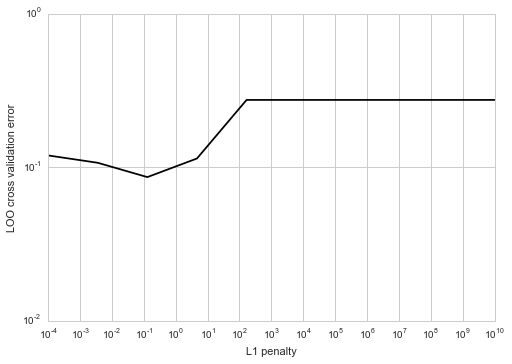

In [97]:
# plot the results
plt.plot(l1_penalty_values,l1_penalty_mse,'k-')
plt.xlabel('L1 penalty')
plt.ylabel('LOO cross validation error')
plt.xscale('log')
plt.yscale('log')

In [99]:
# run the model with the best lambda for which the RSS is the smallest
model = polynomial_lasso_regression(data, deg=16, l1_penalty = best_l1_penalty)
print_coefficients(model)

Learned polynomial for degree 16:
       16          6         5
1.955 x  - 0.7905 x - 3.042 x + 1.187 x + 0.3557
